In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Introduction to Networkx

The simple methods '.nodes()' and '.edges()' print the key components of the network.

In [5]:
HG = nx.house_graph()
HG.nodes()
HG.edges()

NodeView((0, 1, 2, 3, 4))

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

## Drawing the network

To draw the network, we need to give it a dictionary that maps each node to an X-Y coordinate. I give one below.

{0: Text(0, 0, '0'),
 1: Text(1, 0, '1'),
 2: Text(0, 1, '2'),
 3: Text(1, 1, '3'),
 4: Text(0.5, 2.0, '4')}

(-0.10500000000000001, 1.105, -0.21000000000000002, 2.21)

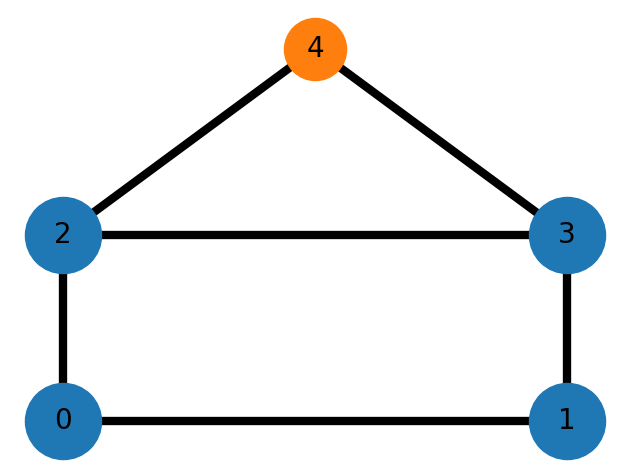

In [8]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}

nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], 
    node_color="tab:blue"
)

nx.draw_networkx_nodes(HG, pos, node_size=2000, 
                       nodelist=[4], node_color="tab:orange")

nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)
plt.tight_layout()
plt.axis("off")

In [9]:
ADJ = nx.to_pandas_adjacency(HG)
ADJ = ADJ.astype(bool)

In [10]:
deg_0 = nx.degree(HG, 0) 
deg_0

2

# Activity
We will learn how to process a dataframe into a useable edgelist to feed into a graph.

In [12]:
df = pd.read_pickle("../public_data/Raw_Tweets.pkl") # Load your tweets
df.head()
df.shape

,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid
12221,1221208309728006145,418859255,Sat Jan 25 23:08:44 +0000 2020,en,"RT @DepSecHargan: Every year in the US, 34,800...",retweeted_tweet_without_comment,638,1837,17778,[920035992073064450],9.200360e+17,1.221208e+18,NaN,NaN,NaN
28315,1221213073652043776,14499829,Sat Jan 25 23:27:40 +0000 2020,en,WHO’s risk assessment of the new #coronavirus ...,original,1743,5196950,46697,[],NaN,NaN,NaN,NaN,NaN
6092,1222281847163576321,1135486501,Tue Jan 28 22:14:35 +0000 2020,en,#FYI: 50 million are under travel restrictions...,original,950,27025,11145,[9624742],NaN,NaN,NaN,NaN,NaN
13618,1222289121118511104,117793973,Tue Jan 28 22:43:30 +0000 2020,en,What should I do if I have traveled to China a...,original,1236,5860,4578,[],NaN,NaN,NaN,NaN,NaN
19205,1222285279047843843,1465196934,Tue Jan 28 22:28:14 +0000 2020,en,Disease outbreaks can result in misinformation...,original,1946,3581,4636,[],NaN,NaN,NaN,NaN,NaN


(59887, 15)

### 1.1 Subset the dataframe to network data

- First, using .value_counts(), identify how many types of tweets there are, using the tweet_type column. 
- Then, filter out all tweets that are not "retweeted_tweet_without_comment" and "quoted_tweet."

In [15]:
# your code here
df["tweet_type"].value_counts()

tweet_type
original                           26275
retweeted_tweet_without_comment    19923
reply                               7292
quoted_tweet                        6397
Name: count, dtype: int64

In [16]:
## Run this. Why is it empty?
df[(df.tweet_type == "retweeted_tweet_without_comment") & (df.tweet_type == "quoted_tweet")]

,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid


### 1.2 Create an edgelist

The "userid" column shows the person that did the retweeting. Create a new column called "userid2" that denotes the user retweeted. You will need to use the columns "rt_userid" and "qtd_userid."

In [19]:
#df["userid2"] = df[(df.rt_userid != "NaN") & (df.qtd_userid == "NaN")]
df["userid2"] = df["rt_userid"].combine_first(df["qtd_userid"])
    
df

,tweetid,userid,date,lang,text,tweet_type,friends_count,followers_count,statuses_count,mentionid,rt_userid,rt_tweetid,qtd_userid,qtd_text,qtd_tweetid,userid2
12221,1221208309728006145,418859255,Sat Jan 25 23:08:44 +0000 2020,en,"RT @DepSecHargan: Every year in the US, 34,800...",retweeted_tweet_without_comment,638,1837,17778,[920035992073064450],9.200360e+17,1.221208e+18,NaN,NaN,NaN,9.200360e+17
28315,1221213073652043776,14499829,Sat Jan 25 23:27:40 +0000 2020,en,WHO’s risk assessment of the new #coronavirus ...,original,1743,5196950,46697,[],NaN,NaN,NaN,NaN,NaN,NaN
6092,1222281847163576321,1135486501,Tue Jan 28 22:14:35 +0000 2020,en,#FYI: 50 million are under travel restrictions...,original,950,27025,11145,[9624742],NaN,NaN,NaN,NaN,NaN,NaN
13618,1222289121118511104,117793973,Tue Jan 28 22:43:30 +0000 2020,en,What should I do if I have traveled to China a...,original,1236,5860,4578,[],NaN,NaN,NaN,NaN,NaN,NaN
19205,1222285279047843843,1465196934,Tue Jan 28 22:28:14 +0000 2020,en,Disease outbreaks can result in misinformation...,original,1946,3581,4636,[],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116861,1320011868228997124,29201047,Sat Oct 24 14:38:48 +0000 2020,en,We’re moving in the wrong direction &amp; ther...,original,1009,488682,12147,[],NaN,NaN,NaN,NaN,NaN,NaN
118583,1320012011967815680,2353731720,Sat Oct 24 14:39:22 +0000 2020,en,".@WV_DHHR reports as of 10:00 a.m., October 24...",original,307,5898,8093,[2353731720],NaN,NaN,NaN,NaN,NaN,NaN
159427,1320015434972909568,18909919,Sat Oct 24 14:52:59 +0000 2020,en,We must tackle this pandemic together. We can ...,original,4595,27281,12771,[],NaN,NaN,NaN,NaN,NaN,NaN
159487,1320015440249225218,44783853,Sat Oct 24 14:53:00 +0000 2020,en,RT @CDCgov: Today is a good day to talk with y...,retweeted_tweet_without_comment,396,1013652,22511,[146569971],1.465700e+08,1.318949e+18,NaN,NaN,NaN,1.465700e+08


### 1.3 Sentiment scoring. 
- Now, use SentimentIntensityAnalyzer to label the sentiment of the text, in a new column called "weight." 
- The subset the dataframe to only have "userid", "user2", and "weight". 
- Rename "userid" to "user1", then group by "user1" and "user2", to find the mean sentiment (mean weight).

You now have your first edgelist!

In [21]:
import nltk
nltk.download('vader_lexicon')

S = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/trak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
"""df["weight"] = ""
for index, row in df.iterrows():
    row["weight"] == S.polarity_scores(row["text"])
"""

df.text.apply(lambda x: S.polarity_scores(x) )

12221     {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
28315     {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...
6092      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
13618     {'neg': 0.227, 'neu': 0.584, 'pos': 0.189, 'co...
19205     {'neg': 0.112, 'neu': 0.777, 'pos': 0.112, 'co...
                                ...                        
116861    {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'comp...
118583    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
159427    {'neg': 0.08, 'neu': 0.773, 'pos': 0.147, 'com...
159487    {'neg': 0.125, 'neu': 0.777, 'pos': 0.098, 'co...
166622    {'neg': 0.117, 'neu': 0.762, 'pos': 0.121, 'co...
Name: text, Length: 59887, dtype: object

In [53]:
df

12221      
28315      
6092       
13618      
19205      
         ..
116861     
118583     
159427     
159487     
166622     
Name: weight, Length: 59887, dtype: object

# Netwulf Visualization
#### If you don't have the module, pip install netwulf
#### https://netwulf.readthedocs.io/en/latest/about.html

In [55]:
EL =  pd.read_pickle("../public_data/edge_list_final2.pkl")

In [57]:
EL[["user1","user2"]].values

array([[ 426033838,  146569971],
       [ 418859255,  146569971],
       [ 418859255,  146569971],
       ...,
       [2953974395,    5558312],
       [2953974395, 1209417007],
       [  18023868,   23711785]])

In [59]:
G = nx.Graph() # Creates a graph object
G.add_edges_from( EL[["user1","user2"]].values ) # Adds edges (and hence nodes from the edgelist)

# Creates the biggest subgraph
CC_nodes = list( nx.connected_components(G) )[0] # Generates a list of connected components, extracts the largest
GG = nx.subgraph(G, CC_nodes) # Creates the subgraph of the largest CC

In [63]:
pip install netwulf

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'netwulf' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'netwulf'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for netwulf: filename=netwulf-0.1.5-py3-none-any.whl size=238064 sha256=e60218cf88beff12fef71bb422f7d7ba850ffcb1f8e8427d7af2dffa2189a54e
  Stored in directory: /Users/trak/Library/Caches/pip/wheels/c1/61/9f/9ad2e17264b402714cb0c66f2bc6c879b64b3bc981c14ee610
Successfully built netwulf
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [netwulf]
Note: you may need to restart the kernel to use updated packages.


In [65]:
from netwulf import visualize
import netwulf as nw

/opt/anaconda3/envs/textenv/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


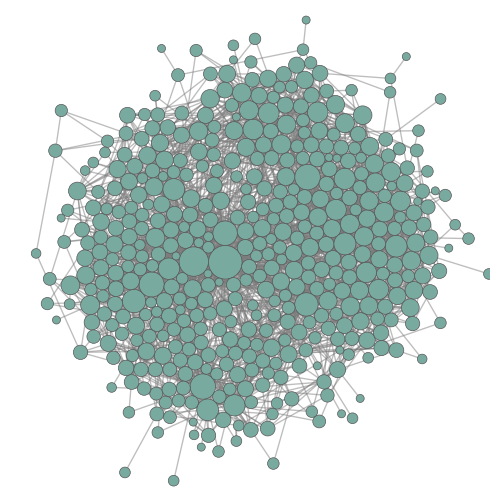

In [67]:
stylized_network, config = visualize(GG,)

In [69]:
U = pd.read_pickle("../public_data/UserInfo.pkl")
id2color = dict(zip(U.userid.values, U.PlotColor.values))
for k, v in GG.nodes(data=True):
    v["group"] = id2color[k]

In [71]:
U

,userid,PlotColor,User_type
0,1079770852302950016,grey,Independent
1,172858784,royalblue,Democrat
2,48117116,firebrick,Republican
3,129259273,firebrick,Republican
4,1249982359,firebrick,Republican
...,...,...,...
659,188369254,gold,Health Official
660,59545968,gold,Health Official
661,2353731720,gold,Health Official
662,293028988,gold,Health Official


In [73]:
# [n["group"] for n in GG.nodes(data=True)]

In [75]:
GG.nodes()[426033838]

{'group': 'gold'}

/opt/anaconda3/envs/textenv/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


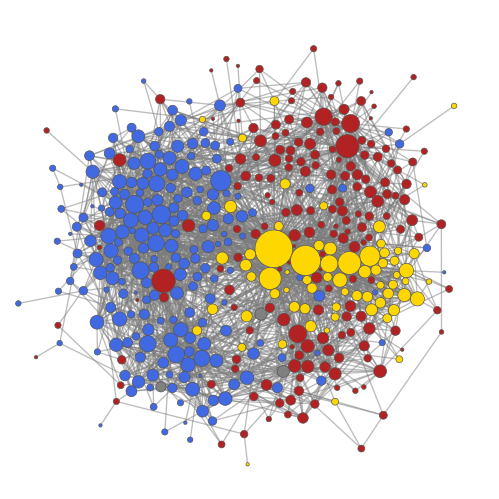

In [77]:
stylized_network, config = visualize(GG,port=2000)

### Activity Two
- Create a new column in U called "Degree," which denotes the degree of the node (userid). You will want to use G.degree()[n] where n is the userid.
- Group by User Type. Which group was the most popular during the pandemic?

In [ ]:
# your code here.

In [95]:
U["Degree"] = G.degree()["userid"]

KeyError: 'userid'

In [85]:
U

,userid,PlotColor,User_type
0,1079770852302950016,grey,Independent
1,172858784,royalblue,Democrat
2,48117116,firebrick,Republican
3,129259273,firebrick,Republican
4,1249982359,firebrick,Republican
...,...,...,...
659,188369254,gold,Health Official
660,59545968,gold,Health Official
661,2353731720,gold,Health Official
662,293028988,gold,Health Official
